In [28]:
!pip3 install essentia

In [29]:
!pip3 install madmom

In [30]:
!pip3 install mir_eval

The section below is all path dependent

In [31]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [32]:
import madmom

In [33]:
!ls 'drive/MyDrive/Bass'

 001_beats.csv
 001_beats.gsheet
 002_beats.csv
 abesser_music
 bassunet.py
 data
 data_old
 deviations
 EnergyChecker_AllStems.ipynb
 EnergyChecker_Student_TrinityBillieJean.ipynb
 grades
 HistogramTestBillieJean.ipynb
 HistogramTestBrown.ipynb
 HistogramTestJust.ipynb
 HistogramTestRoad.ipynb
 HistogramTestWOTM.ipynb
 HistogramTestYellow.ipynb
 IEC_billieJean.csv
 __init__.py
 LICENSE
 music
 notebooks_june
 notebooks_may
 pooling.py
 __pycache__
 README.md
 SG_Student_TrinityWOTM.ipynb
 SOP_Student_TrinityBillieJean.ipynb
 statistics
 Statistics_IEC_billieJean.csv
 StudentStatistics_BillieJean.csv
 StudentStatisticsInput.csv
 tcl_annotate
 Test_Student_ONSET_TrinityYellow.ipynb
'Thesis Review Meeting.gdoc'
 txt


In [34]:
# TODO 1 optimise imports
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [35]:
import mir_eval
from mir_eval import *

In [37]:
statsPath = 'drive/MyDrive/Bass/data/just/StudentStatistics_just.csv'
statsCols =  ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             " TF 2 Mark ", "Sound Quality Mark", " finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [38]:
onset_mean_list = df_all["Onset Mean"].tolist()   
print(len(onset_mean_list))
#Student 	precision 	recall 	f_measure_value 	Onset ABS Mean 	Onset Mean 	Onset Std 	Duration ABS Mean 	Duration Mean 	Duration Std 	onsetMark 	DurationMark 	articulationMark 	soundQualityMark 	volumeControlMark 	finalMark

13


In [39]:
print(type(onset_mean_list))
m = mean(onset_mean_list)
print (onset_mean_list)

<class 'list'>
[-0.0, 0.006, 0.008, -0.004, 0.003, -0.015, -0.01, 0.003, -0.006, -0.0, 0.013000000000000001, 0.02, -0.005]


In [40]:
#
#
#  This allows the generation of multiple histograms by passing the K parameter.
#
#
from math import *
def multiple_hist(deviationsArray1,deviationsArray2,title_text1,title_text2,df,k):
   student_stats1 = [] # onsets
   student_stats2 = [] # durations
   #statsCols = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std","Duration ABS Mean","Duration Mean","Duration Std",
   #   GRADES  "onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]
   list0 = df["onsetMark"].tolist()  
   list1 = df[" DurationMark"].tolist()  
   list2 = df[" articulationMark "].tolist()  
   list3 = df["soundQualityMark"].tolist()  
   list4 = df["volumeControlMark"].tolist()  
   list5 = df[" finalMark"].tolist()  
   #k = 0 # Zeroth student is GT
   print("Onset Grade = ", list0[k],"\t" ,"Offset Grade = ", list1[k])
   print("\n")
   print("Articulation Grade = ", list2[k],"Sound Q Grade = ", list3[k], "Volume Control Grade = ", list4[k])
   print("Final Mark = ", list5[k])
   print("ok1")
   a= deviationsArray1
   m= mean(a)
   print(m)
   s = sqrt(mean(a*a))
   print("ok3")
   am = mean(abs(a))

   onset_summary= "Onset ABS Mean: %f, Onset Mean: %f,Dev. from 0: %f" %(am, m, s)
   title =   "Student "  + str(k) +title_text1
   plt.subplot(2,2,1)
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)

   plt.subplot(2,2,2)
   a = deviationsArray2
   m, s = mean(a), sqrt(mean(a*a))
   am = mean(abs(a))
   offset_summary= "Offset ABS Mean: %f, Offset Mean: %f, Dev. from 0: %f" %(am,m, s)
   title =   "Student " + str(k) +title_text2
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)
   plt.show()

In [42]:
index = df_all.index
number_of_rows = len(index)
print(number_of_rows)

k=0
# sonset_deviations,soffset_deviations,
while k<number_of_rows:

   k+=1

13


In [41]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
while k<number_of_rows:
   sdeviatePath = 'drive/MyDrive/Bass/data/just/just_devs_student' + str(k)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   print(len(sonset_dev_list))
   #multiple_hist(sonset_dev_list,soffset_dev_list," onsets"," offsets",df_all,k)
   k+=1

85


In [43]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,1.000,0.988,0.994,0.000,-0.000,0.000,0.000,-0.000,0.000,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.067,0.070,0.068,0.008,0.006,0.010,0.858,-0.854,1.196,79.2,90.0,79.2,79.2,90.0,3.60
2,2,0.236,0.244,0.240,0.010,0.008,0.012,0.172,-0.081,0.523,90.0,90.0,79.2,90.0,90.0,4.50
3,3,0.102,0.116,0.109,0.013,-0.004,0.014,0.203,-0.199,0.558,79.2,90.0,79.2,79.2,79.2,3.60
4,4,0.432,0.477,0.453,0.010,0.003,0.012,0.043,-0.011,0.101,90.0,90.0,90.0,90.0,90.0,4.50
5,5,0.013,0.012,0.012,0.015,-0.015,0.015,0.710,-0.710,0.710,56.7,72.0,72.0,79.2,72.0,0.90
6,6,0.011,0.012,0.011,0.010,-0.010,0.010,0.020,-0.020,0.020,79.2,90.0,79.2,90.0,90.0,3.60
7,7,0.055,0.070,0.062,0.005,0.003,0.006,0.323,-0.243,0.427,79.2,79.2,79.2,79.2,72.0,2.70
8,8,0.051,0.105,0.069,0.011,-0.006,0.011,0.717,-0.717,1.179,79.2,79.2,79.2,79.2,79.2,3.60
9,9,0.216,0.372,0.274,0.010,-0.000,0.011,0.481,-0.476,0.851,79.2,90.0,79.2,90.0,79.2,3.60


In [ ]:
!ls drive/MyDrive/Bass/data/*.csv

In [50]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
   header = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             " TF 2 Mark ", "Sound Quality Mark", " finalMark"]
   
   studentStatisticsArray= []
   with open('drive/MyDrive/Bass/data/StudentStatistics_just_out.csv', 'w', encoding='UTF8') as f:
      #dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatistics_yellow.csv')


      idx = df.index

      number_of_rows = len(idx)
      print(number_of_rows)
      k=0

      writer = csv.writer(f)
      # write the header
      writer.writerow(header)

      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" articulationMark "].tolist()  
      list3 = df["soundQualityMark"].tolist()  
      list4 = df["volumeControlMark"].tolist()  
      list5 = df[" finalMark"].tolist()  

      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
  
      for k in range(number_of_rows-1):
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          print(a[0:12])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1

          onset_X.append( list0[k])  # Martis mark
          print("list0[k]")
          print(list0[k])
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          print(title)
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print("\n")
          print(onset_summary)
          print("\n")
          print(duration_summary)
          print("\n")
          print("Articulation Grade = ", list2[k],"Sound Control Grade = ", list3[k], "Volume Control Grade = ", list4[k])
          print("Final Mark = ", list5[k])
          studentStatistics = []
          studentStatistics.append(str(k+1))
          studentStatistics.append(round(listp[k],3))
          print("////////////////////////////")
          print(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
          studentStatistics.append(list5[k])
          # write the data
          writer.writerow(studentStatistics)
          studentStatisticsArray.append(studentStatistics)
    
   return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


In [51]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

13


KeyError: ignored

In [ ]:
!ls drive/MyDrive/Bass/Bass

In [53]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,1.000,0.988,0.994,0.000,-0.000,0.000,0.000,-0.000,0.000,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.067,0.070,0.068,0.008,0.006,0.010,0.858,-0.854,1.196,79.2,90.0,79.2,79.2,90.0,3.60
2,2,0.236,0.244,0.240,0.010,0.008,0.012,0.172,-0.081,0.523,90.0,90.0,79.2,90.0,90.0,4.50
3,3,0.102,0.116,0.109,0.013,-0.004,0.014,0.203,-0.199,0.558,79.2,90.0,79.2,79.2,79.2,3.60
4,4,0.432,0.477,0.453,0.010,0.003,0.012,0.043,-0.011,0.101,90.0,90.0,90.0,90.0,90.0,4.50
5,5,0.013,0.012,0.012,0.015,-0.015,0.015,0.710,-0.710,0.710,56.7,72.0,72.0,79.2,72.0,0.90
6,6,0.011,0.012,0.011,0.010,-0.010,0.010,0.020,-0.020,0.020,79.2,90.0,79.2,90.0,90.0,3.60
7,7,0.055,0.070,0.062,0.005,0.003,0.006,0.323,-0.243,0.427,79.2,79.2,79.2,79.2,72.0,2.70
8,8,0.051,0.105,0.069,0.011,-0.006,0.011,0.717,-0.717,1.179,79.2,79.2,79.2,79.2,79.2,3.60
9,9,0.216,0.372,0.274,0.010,-0.000,0.011,0.481,-0.476,0.851,79.2,90.0,79.2,90.0,79.2,3.60


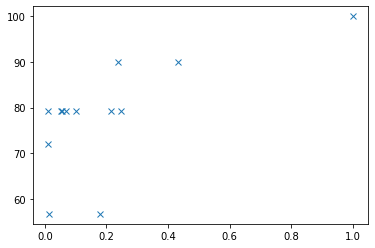

[100.0, 79.2, 90.0, 79.2, 90.0, 56.7, 79.2, 79.2, 79.2, 79.2, 56.7, 72.0, 79.2]


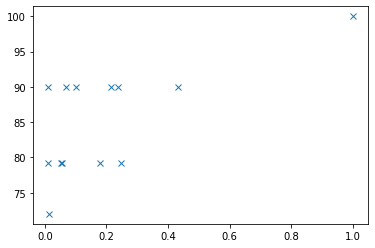

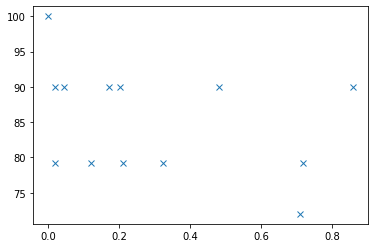

In [54]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_precision_list = df_all["precision"].tolist()   

plt.plot(onset_precision_list,onset_grade_list, 'x')
plt.show()

Duration_mean_list = df_all["Duration Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()
Duration_grade_list = df_all[" DurationMark"].tolist()   
print(onset_grade_list)

plt.plot(onset_precision_list,Duration_grade_list, 'x')
plt.show()

plt.plot(Duration_amean_list,Duration_grade_list, 'x')
plt.show()

# I should try to plot Precision against  ONSET_GRADE(Y) vs PRECISION (X)
# I should try to plot Precision against  ONSET_GRADE(Y) vs ABSOLUTE MEAN (X)
# TRY TO EXPLAIN
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= 
#statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [55]:
import pandas as pd
#sonset_deviations,soffset_deviations

In [ ]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [ ]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [61]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/just/StudentStatistics_just.csv')

#dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatisticsBillie.csv')
header = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             " TF 2 Mark ", "Sound Quality Mark", " finalMark"]

In [ ]:
dataset

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
#X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
#X = dataset[['precision','recall','f_measure_value']]#,'Onset Mean','Onset Std']]
X = dataset[['precision','recall','f_measure_value']]#,]]
#X = dataset[['precision','recall','f_measure_value']]#,]]
y=array(dataset['onsetMark'])

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# IEC PRF Mean Absolute Error: 12.079847760757067
# IEC PRF Root Mean Squared Error: 12.521853181718802

      Actual  Predicted
0  79.199997  72.854928
1  72.000000  73.866432
2  90.000000  90.703671
3  56.700001  79.140241
Mean Absolute Error: 7.838853057776216
Root Mean Squared Error: 11.702595727966983


In [78]:
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean','Duration Mean','Duration Std']]
X = dataset[['precision','recall','f_measure_value']]
y=array(dataset[' DurationMark'])

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


      Actual  Predicted
0  90.000000  80.363244
1  79.199997  80.612312
2  90.000000  91.176206
3  79.199997  84.275276
Mean Absolute Error: 4.325139190679888
Root Mean Squared Error: 5.5227625666088604


In [79]:
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean','Duration Mean','Duration Std']]
X = dataset[['precision','recall','f_measure_value','Duration Mean','Onset Mean']]
y=array(dataset[' finalMark'])

In [82]:


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


   Actual  Predicted
0    3.60   3.140137
1    2.70   5.993779
2    4.50   3.588377
3    2.52   5.012921
Mean Absolute Error: 1.789546685033806
Root Mean Squared Error: 2.1275671531420417


In [ ]:
y